# **Data Visualization Notebook**

## Objectives

* The client is interested in gaining insights from the Food Balance Sheet Europe dataset to better understand food production, supply, and consumption patterns across European countries. The goal is to perform exploratory data analysis (EDA) and create clear, informative visualizations that highlight trends, disparities, and key statistics. This analysis will support decision-making related to food policy, sustainability, and resource allocation.

## Inputs

* The preprocessed dataset located at data/food_balance_sheet_europe.csv, generated by DataCollection.ipynb.

* Functions from food_balance_app.app_pages.data_loader (load_and_preprocess_data), food_balance_app.app_pages.data_analysis (perform_eda, get_key_insights), and food_balance_app.app_pages.visualizations (plot_distributions, plot_time_series, plot_comparisons).

* Python libraries: pandas, streamlit, plotly (via visualizations.py)

## Outputs

* Printed EDA results (dataset shape, columns, missing values, data types).
* List of key insights derived from the dataset (e.g., top producers, production trends).
* Visualizations displayed in the notebook:
   * Histograms of numeric columns (e.g., Production, Import Quantity).
   * Time series plot of Production for top countries.
   * Bar chart comparing key metrics across countries.
* No files are saved, but visualizations can be exported manually if needed.    

## Additional Comments

* The notebook dataset contains columns like Country, Year, Production, Import Quantity, Export Quantity, and Total Supply. If column names differ, update the numeric_cols and metrics lists in the code. 
* Visualizations use Plotly via Streamlit functions for interactivity, matching the app’s UI style.
* Run this notebook after DataCollection.ipynb to ensure the dataset exists.



---

# Import Packages

### Install Dependencies

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [10]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Documents\\food sheet prediction\\food-sheet-prediction\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [11]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Documents\\food sheet prediction\\food-sheet-prediction\\jupyter_notebooks'

---

### **Set Data Directory**

---

### Import libraries

In [33]:
import sys
from pathlib import Path

# Print current working directory & project root
print("Current working directory:", Path().resolve())
print("Project root:", Path().resolve().parent)

# Manually check if 'app_pages' exists inside the project root
project_root = Path().resolve().parent
print("Does 'app_pages' exist?", (project_root / "app_pages").exists())

# Add project root to Python path
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))  # Insert at start for priority

Current working directory: C:\Users\User\Documents\food sheet prediction\food-sheet-prediction\jupyter_notebooks
Project root: C:\Users\User\Documents\food sheet prediction\food-sheet-prediction
Does 'app_pages' exist? True


In [34]:
import os

# Get current working directory
current_path = os.getcwd()
print("Current working directory:", current_path)

# Alternative using pathlib (more modern approach)
from pathlib import Path
current_path = Path.cwd()
print("Current path (using pathlib):", current_path)

Current working directory: c:\Users\User\Documents\food sheet prediction\food-sheet-prediction\jupyter_notebooks
Current path (using pathlib): c:\Users\User\Documents\food sheet prediction\food-sheet-prediction\jupyter_notebooks


### Load Dataset

In [35]:
import sys
from pathlib import Path

# 1. Set the correct paths
project_root = Path(r'c:\Users\User\Documents\food sheet prediction\food-sheet-prediction')
data_path = project_root / 'data' / 'food_balance_sheet_europe.csv'
module_path = str(project_root)  # Where data_loader.py actually is

# 2. Verify paths
print(f"Project root: {project_root}")
print(f"Data loader exists: {(project_root/'data_loader.py').exists()}")
print(f"Data file exists: {data_path.exists()}")

# 3. Add to Python path and import
sys.path.append(module_path)
from data_loader import load_and_preprocess_data
print("✅ Import successful!")

# 4. Load and display data
if data_path.exists():
    df = load_and_preprocess_data(str(data_path))
    if df is not None:
        print("\n✅ Dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        display(df.head())  # Works in Jupyter
    else:
        print("⚠️ Function returned None!")
else:
    print(f"❌ Data file not found at: {data_path}")

Project root: c:\Users\User\Documents\food sheet prediction\food-sheet-prediction
Data loader exists: True
Data file exists: True
✅ Import successful!

✅ Dataset loaded successfully!
Shape: (1214, 14)
Columns: ['Domain Code', 'Domain', 'Country Code', 'Country', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']


,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,5400,Europe,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,742186.0,A,"Aggregate, may include official, semi-official..."
1,FBS,Food Balance Sheets,5400,Europe,5511,Production,2511,Wheat and products,2013,2013,1000 tonnes,226089.0,A,"Aggregate, may include official, semi-official..."
2,FBS,Food Balance Sheets,5400,Europe,5611,Import Quantity,2511,Wheat and products,2013,2013,1000 tonnes,45338.0,A,"Aggregate, may include official, semi-official..."
3,FBS,Food Balance Sheets,5400,Europe,5072,Stock Variation,2511,Wheat and products,2013,2013,1000 tonnes,-4775.0,A,"Aggregate, may include official, semi-official..."
4,FBS,Food Balance Sheets,5400,Europe,5911,Export Quantity,2511,Wheat and products,2013,2013,1000 tonnes,91363.0,A,"Aggregate, may include official, semi-official..."


# Section 1

### Perform EDA

In [41]:
# Cell 3: Define and perform EDA
import numpy as np

def perform_eda(df):
    """
    Perform exploratory data analysis on a DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        dict: Dictionary containing EDA results
    """
    if df is None:
        raise ValueError("Cannot perform EDA on None DataFrame")
        
    return {
        'shape': df.shape,
        'columns': df.columns.tolist(),
        'missing_values': df.isnull().sum().to_dict(),
        'data_types': df.dtypes.astype(str).to_dict(),
        'numeric_stats': df.describe().to_dict() if df.select_dtypes(include=np.number).shape[1] > 0 else {}
    }

# Now you can use the function
eda_results = perform_eda(df)
print("EDA Results:")
print(f"Shape: {eda_results['shape']}")
print(f"Columns: {eda_results['columns']}")
print("\nMissing Values:")
for col, count in eda_results['missing_values'].items():
    print(f"{col}: {count}")
print("\nData Types:")
for col, dtype in eda_results['data_types'].items():
    print(f"{col}: {dtype}")

EDA Results:
Shape: (1214, 14)
Columns: ['Domain Code', 'Domain', 'Country Code', 'Country', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']

Missing Values:
Domain Code: 0
Domain: 0
Country Code: 0
Country: 0
Element Code: 0
Element: 0
Item Code: 0
Item: 0
Year Code: 0
Year: 0
Unit: 0
Value: 0
Flag: 0
Flag Description: 0

Data Types:
Domain Code: object
Domain: object
Country Code: int64
Country: object
Element Code: int64
Element: object
Item Code: int64
Item: object
Year Code: int64
Year: int64
Unit: object
Value: float64
Flag: object
Flag Description: object


---

# Section 2

### Key Insights

In [ ]:
# Cell 4: 
def get_key_insights(df):
    """
    Extract key insights from the dataframe.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        list: List of insights as strings
    """
    insights = []
    
    
    if df is None or df.empty:
        return ["No data available for analysis"]
    
    
    insights.append(f"Dataset contains {df.shape[0]} records and {df.shape[1]} variables")
    
    
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        cols_with_missing = missing_values[missing_values > 0]
        insights.append(f"Found {len(cols_with_missing)} columns with missing values")
        
    
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        
        if len(num_cols) > 0:
            first_num_col = num_cols[0]
            max_val = df[first_num_col].max()
            min_val = df[first_num_col].min()
            insights.append(f"Range for {first_num_col}: {min_val} to {max_val}")
    
    
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        
        if len(cat_cols) > 0:
            first_cat_col = cat_cols[0]
            unique_count = df[first_cat_col].nunique()
            insights.append(f"Column '{first_cat_col}' has {unique_count} unique values")
    
    
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'year' in col.lower()]
    if date_cols:
        insights.append(f"Potential time-related columns found: {', '.join(date_cols)}")
    
    
    if 'Country' in df.columns:
        insights.append(f"Data includes {df['Country'].nunique()} different countries")
    
    return insights

# Now get the insights
insights = get_key_insights(df)
print("Key Insights:")
for insight in insights:
    print(f"- {insight}")

Key Insights:
- Dataset contains 1214 records and 14 variables
- Range for Country Code: 5400 to 5400
- Column 'Domain Code' has 1 unique values
- Potential time-related columns found: Year Code, Year
- Data includes 1 different countries


### Plot Distributions

Found 6 numeric columns. Plotting distributions for the first 8:


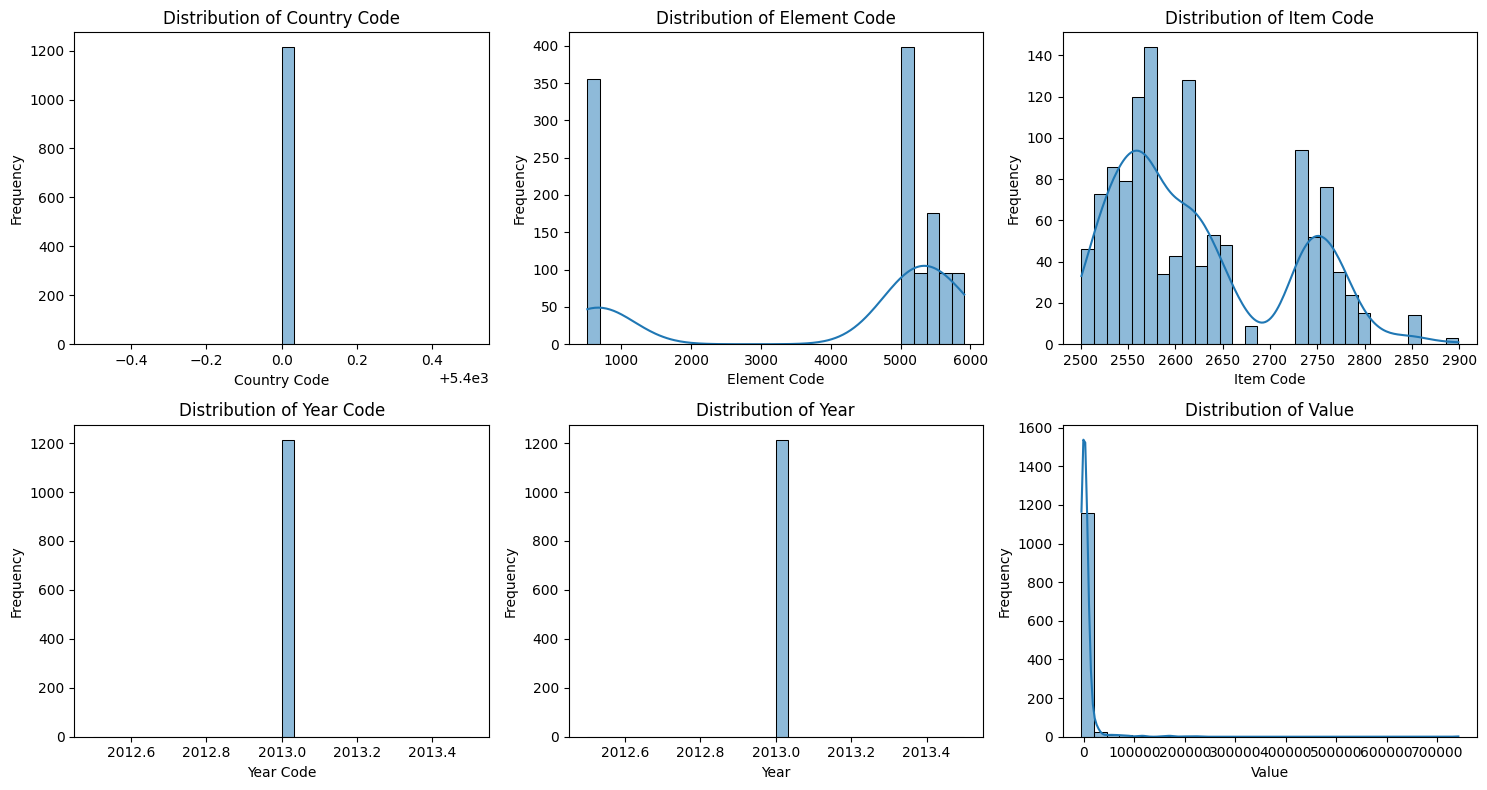

In [47]:
# Cell 5:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, columns=None, max_cols=8):
    """
    Plot distributions for numeric columns
    
    Args:
        df (pd.DataFrame): Input DataFrame
        columns (list, optional): List of columns to plot. If None, uses all numeric columns
        max_cols (int): Maximum number of columns to plot to avoid overcrowding
    """
    
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns.tolist()
    
    
    columns = columns[:max_cols]
    
    if not columns:
        print("No numeric columns available for plotting")
        return
    
    
    n_cols = min(len(columns), 3)  
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(5*n_cols, 4*n_rows))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

if numeric_cols:
    print(f"Found {len(numeric_cols)} numeric columns. Plotting distributions for the first 8:")
    plot_distributions(df, numeric_cols)
else:
    print("No numeric columns found in the DataFrame")
    print("Available columns:", df.columns.tolist())

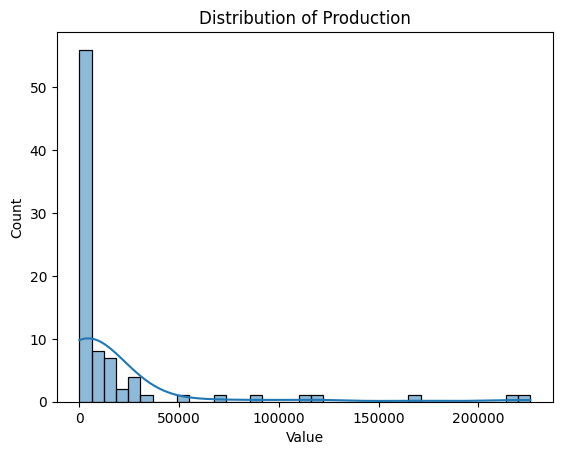

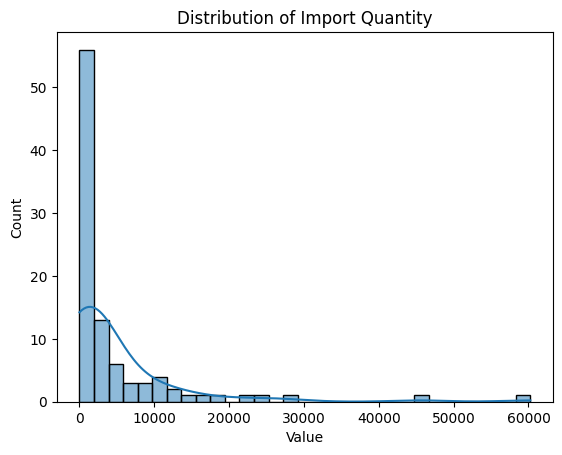

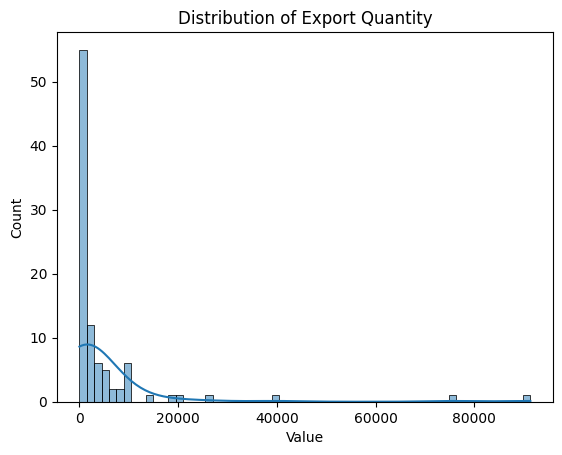

In [24]:
# Plot distribution of Values by specific elements
if 'Element' in df.columns:
    interesting_elements = ['Production', 'Import Quantity', 'Export Quantity', 'Domestic supply']
    for element in interesting_elements:
        subset = df[df['Element'] == element]
        if not subset.empty:
            sns.histplot(subset['Value'], kde=True)
            plt.title(f'Distribution of {element}')
            plt.show()

In [48]:
print("DataFrame Info:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print("\nDescriptive Statistics:")
display(df.describe(include='all'))

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1214 non-null   object 
 1   Domain            1214 non-null   object 
 2   Country Code      1214 non-null   int64  
 3   Country           1214 non-null   object 
 4   Element Code      1214 non-null   int64  
 5   Element           1214 non-null   object 
 6   Item Code         1214 non-null   int64  
 7   Item              1214 non-null   object 
 8   Year Code         1214 non-null   int64  
 9   Year              1214 non-null   int64  
 10  Unit              1214 non-null   object 
 11  Value             1214 non-null   float64
 12  Flag              1214 non-null   object 
 13  Flag Description  1214 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 132.9+ KB
None

First 5 rows:


,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,5400,Europe,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,742186.0,A,"Aggregate, may include official, semi-official..."
1,FBS,Food Balance Sheets,5400,Europe,5511,Production,2511,Wheat and products,2013,2013,1000 tonnes,226089.0,A,"Aggregate, may include official, semi-official..."
2,FBS,Food Balance Sheets,5400,Europe,5611,Import Quantity,2511,Wheat and products,2013,2013,1000 tonnes,45338.0,A,"Aggregate, may include official, semi-official..."
3,FBS,Food Balance Sheets,5400,Europe,5072,Stock Variation,2511,Wheat and products,2013,2013,1000 tonnes,-4775.0,A,"Aggregate, may include official, semi-official..."
4,FBS,Food Balance Sheets,5400,Europe,5911,Export Quantity,2511,Wheat and products,2013,2013,1000 tonnes,91363.0,A,"Aggregate, may include official, semi-official..."



Descriptive Statistics:


,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,1214,1214,1214.0,1214,1214.000000,1214,1214.000000,1214,1214.0,1214.0,1214,1214.000000,1214,1214
unique,1,1,NaN,1,NaN,16,NaN,97,NaN,NaN,5,NaN,2,2
top,FBS,Food Balance Sheets,NaN,Europe,NaN,Import Quantity,NaN,Sunflower seed,NaN,NaN,1000 tonnes,NaN,A,"Aggregate, may include official, semi-official..."
freq,1214,1214,NaN,1214,NaN,95,NaN,15,NaN,NaN,859,NaN,860,860
mean,NaN,NaN,5400.0,NaN,3990.619440,NaN,2624.621911,NaN,2013.0,2013.0,NaN,4987.972891,NaN,NaN
std,NaN,NaN,0.0,NaN,2150.297094,NaN,89.612243,NaN,0.0,0.0,NaN,28128.905766,NaN,NaN
min,NaN,NaN,5400.0,NaN,511.000000,NaN,2501.000000,NaN,2013.0,2013.0,NaN,-4775.000000,NaN,NaN
25%,NaN,NaN,5400.0,NaN,684.000000,NaN,2556.000000,NaN,2013.0,2013.0,NaN,0.740000,NaN,NaN
50%,NaN,NaN,5400.0,NaN,5142.000000,NaN,2602.000000,NaN,2013.0,2013.0,NaN,39.000000,NaN,NaN
75%,NaN,NaN,5400.0,NaN,5511.000000,NaN,2731.000000,NaN,2013.0,2013.0,NaN,1207.750000,NaN,NaN


### Enhanced Distribution Plotting (For All Numeric Columns)

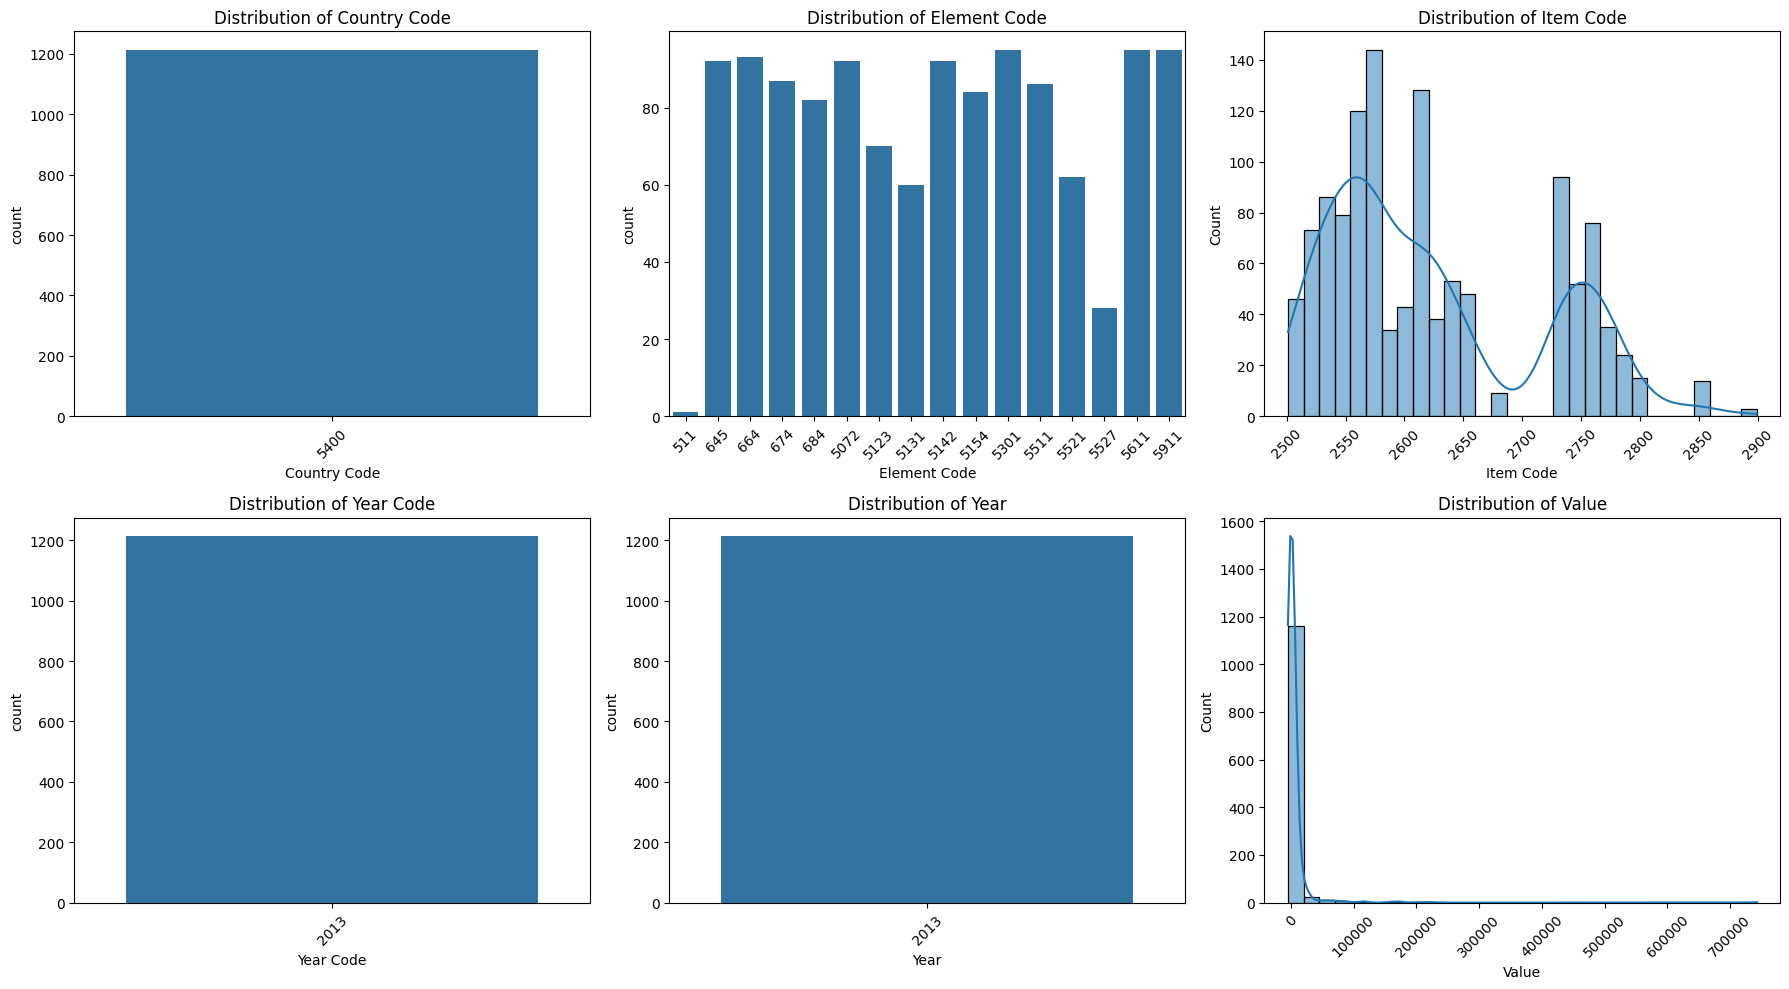

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_distributions(df):
    # Get all numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    # Set up the plot grid
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(18, 5*n_rows))
    
    # Plot each numeric column
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        if df[col].nunique() > 20:  
            sns.histplot(df[col].dropna(), kde=True, bins=30)
        else:  
            sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_all_distributions(df)

### Time Series Analysis

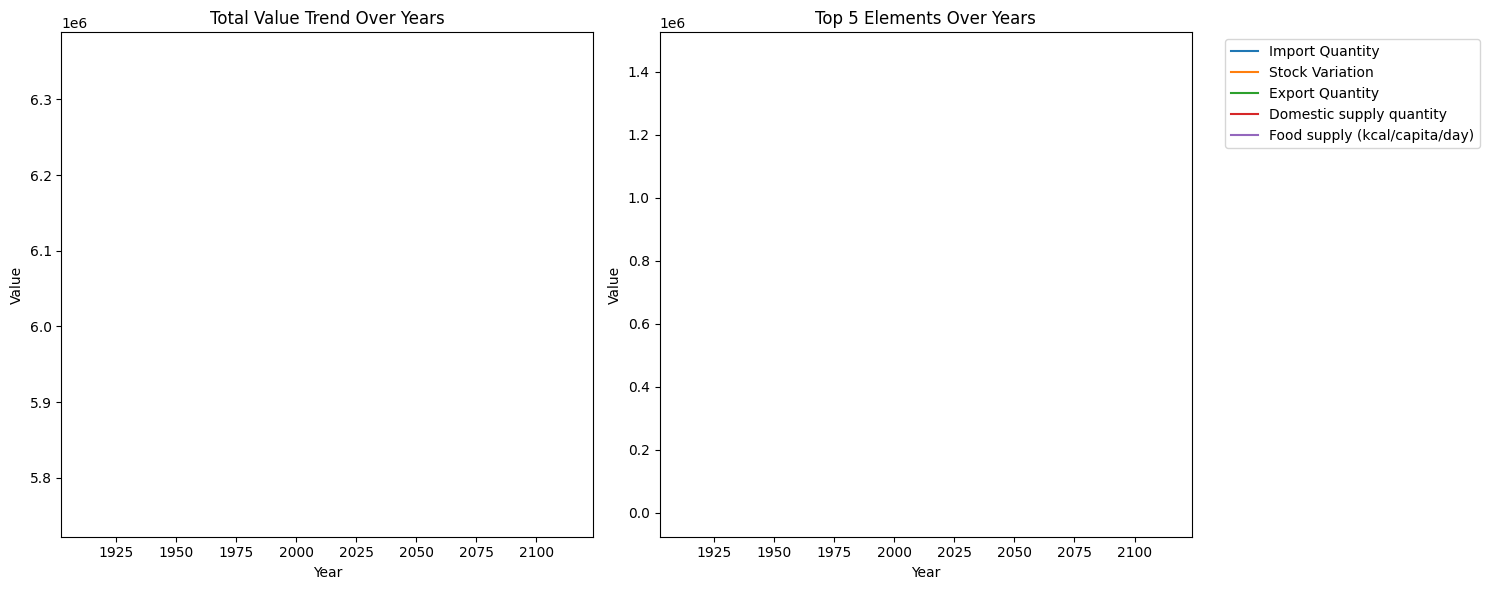

In [51]:
if 'Year' in df.columns and 'Value' in df.columns:
    plt.figure(figsize=(15, 6))
    
    # Option 1: Overall trend
    plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='Value', data=df, estimator='sum', errorbar=None)
    plt.title('Total Value Trend Over Years')
    
    # Option 2: By Element (if available)
    if 'Element' in df.columns:
        plt.subplot(1, 2, 2)
        top_elements = df['Element'].value_counts().nlargest(5).index
        sns.lineplot(x='Year', y='Value', hue='Element', 
                    data=df[df['Element'].isin(top_elements)],
                    estimator='sum', errorbar=None)
        plt.title('Top 5 Elements Over Years')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

### Categorical Analysis For Country and Item Data

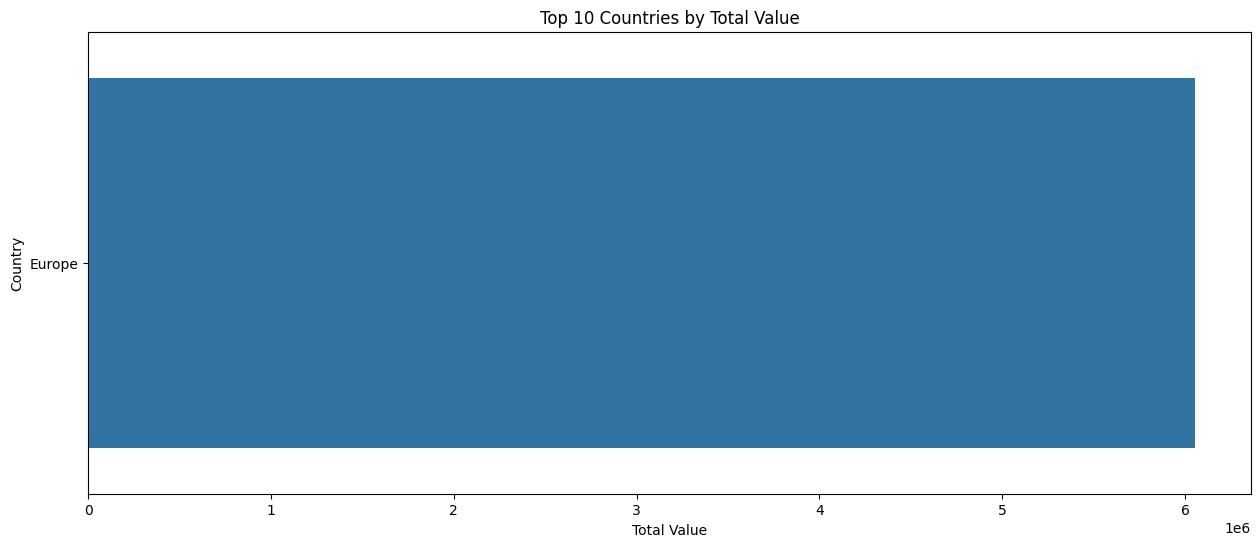

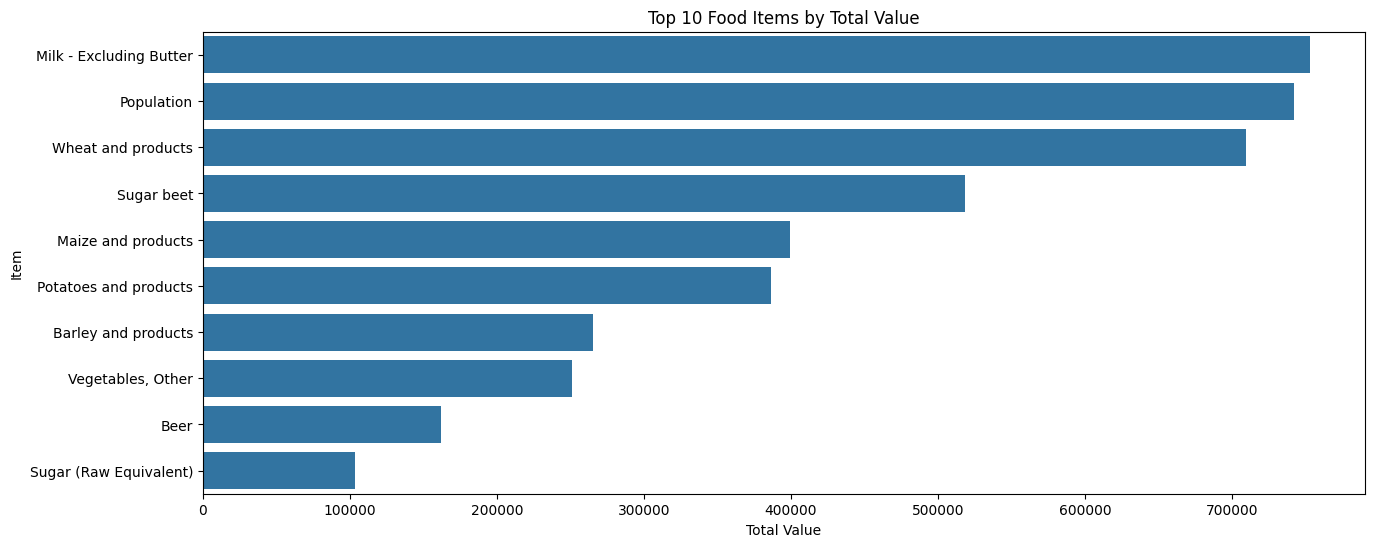

In [52]:
# For Country Analysis
if 'Country' in df.columns:
    plt.figure(figsize=(15, 6))
    
    # Top countries by value
    top_countries = df.groupby('Country')['Value'].sum().nlargest(10)
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title('Top 10 Countries by Total Value')
    plt.xlabel('Total Value')
    plt.show()

# For Item Analysis
if 'Item' in df.columns:
    plt.figure(figsize=(15, 6))
    
    # Top food items by value
    top_items = df.groupby('Item')['Value'].sum().nlargest(10)
    sns.barplot(x=top_items.values, y=top_items.index)
    plt.title('Top 10 Food Items by Total Value')
    plt.xlabel('Total Value')
    plt.show()

 ### Correlation Analysis For Numeric Columns

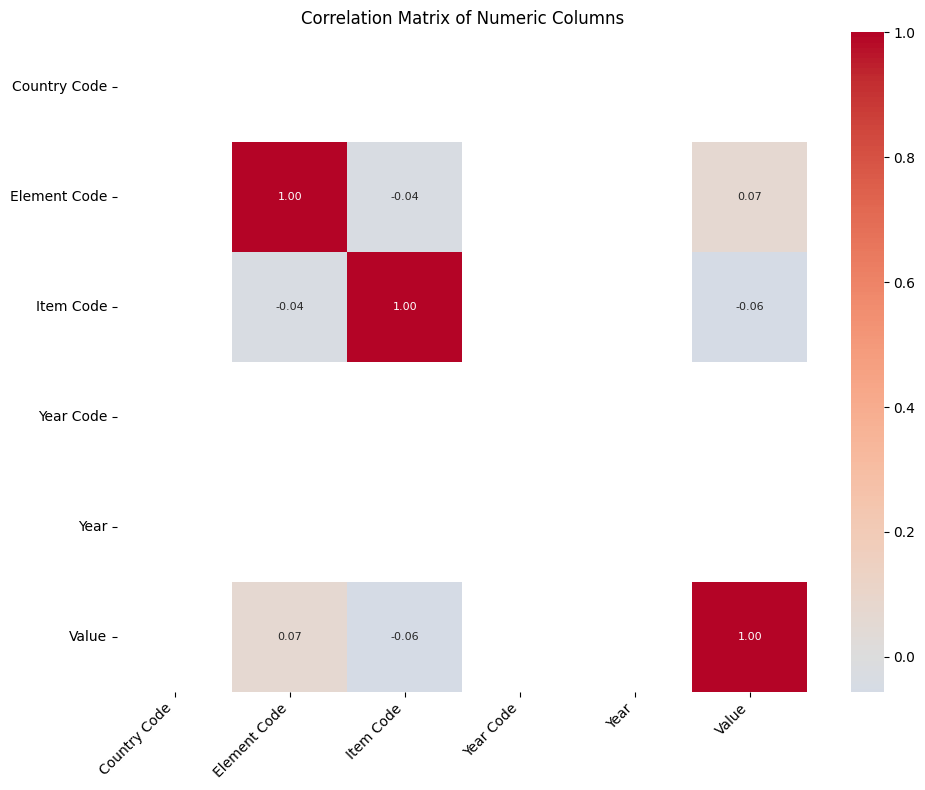


No strong correlations found between variables.


In [ ]:
numeric_df = df.select_dtypes(include=['number'])

if not numeric_df.empty:
    
    if numeric_df.shape[1] > 15:
        print(f"Warning: Found {numeric_df.shape[1]} numeric columns. Showing correlations for the first 15 only.")
        numeric_df = numeric_df.iloc[:, :15]
    
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                annot_kws={"size": 8}, fmt=".2f")
    plt.title('Correlation Matrix of Numeric Columns')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    
    strong_corr = corr_matrix.unstack()
    strong_corr = strong_corr[strong_corr < 1.0]  
    strong_corr = strong_corr[abs(strong_corr) > 0.7]  
    
    if not strong_corr.empty:
        print("\nStrong correlations (>0.7 or <-0.7):")
        for idx, val in strong_corr.sort_values(ascending=False).items():
            print(f"{idx[0]} -- {idx[1]}: {val:.2f}")
    else:
        print("\nNo strong correlations found between variables.")
else:
    print("No numeric columns available for correlation analysis")

### Filter Key Element

In [64]:
key_elements = ['Production', 'Import Quantity', 'Export Quantity', 'Domestic supply']
filtered_df = df[df['Element'].isin(key_elements)].copy()

print(f"Found {len(filtered_df)} records for key elements")
display(filtered_df['Element'].value_counts())

Found 276 records for key elements


Element
Import Quantity    95
Export Quantity    95
Production         86
Name: count, dtype: int64

### Distribution Plots for Each Element

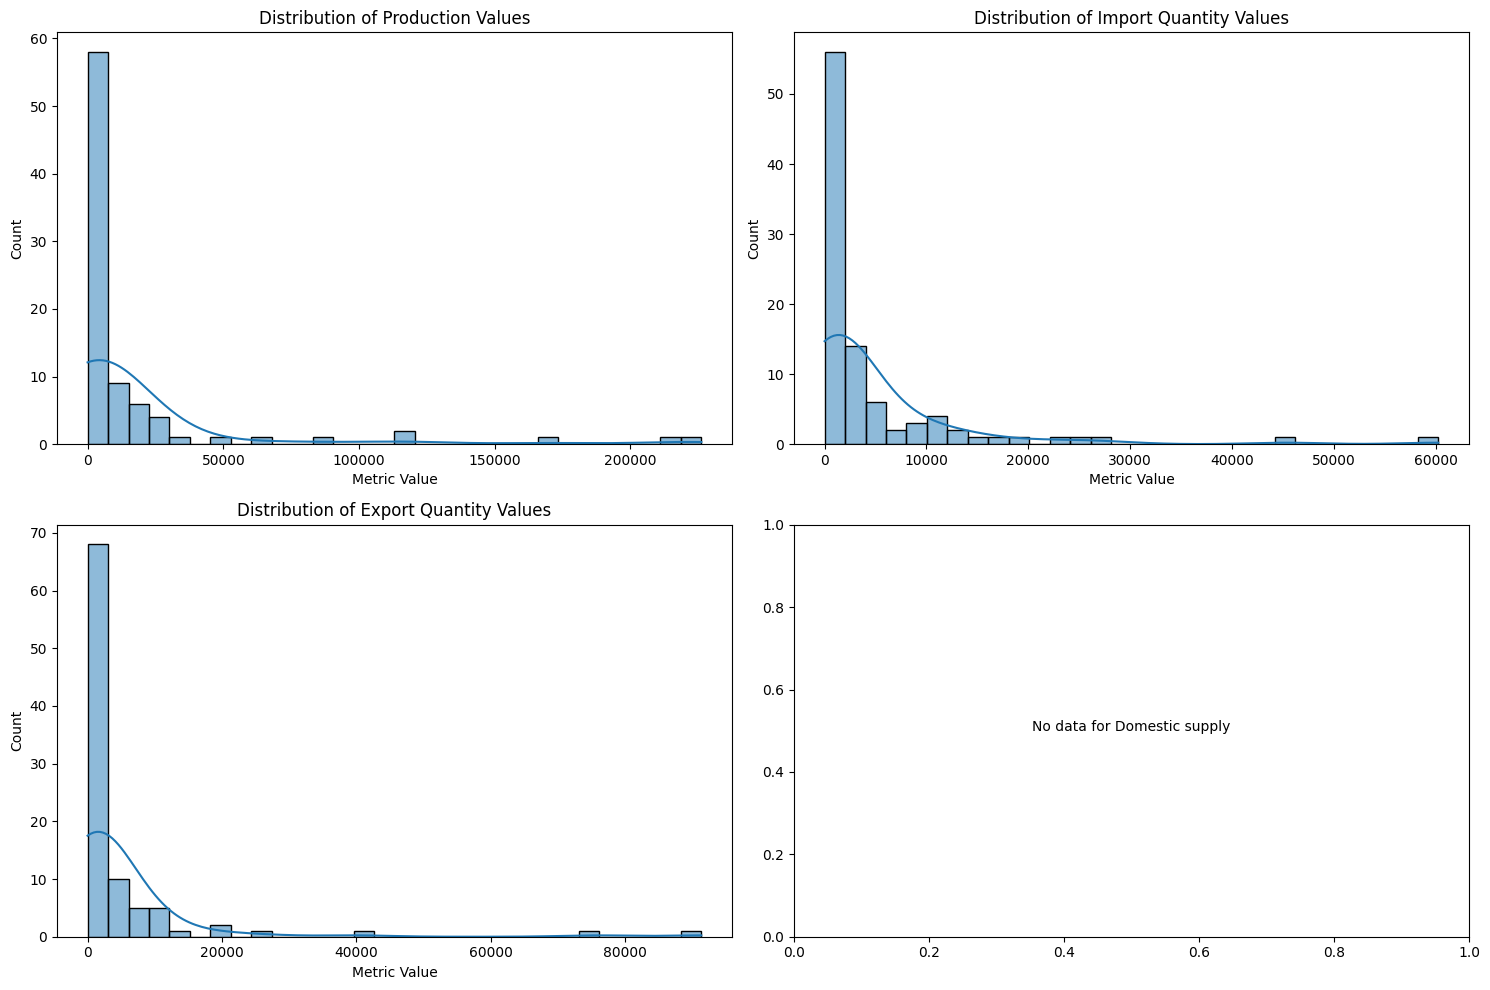

In [56]:
plt.figure(figsize=(15, 10))
for i, element in enumerate(key_elements, 1):
    plt.subplot(2, 2, i)
    element_data = filtered_df[filtered_df['Element'] == element]['Value']
    if not element_data.empty:
        sns.histplot(element_data, kde=True, bins=30)
        plt.title(f'Distribution of {element} Values')
        plt.xlabel('Metric Value')
    else:
        plt.text(0.5, 0.5, f"No data for {element}", ha='center')
plt.tight_layout()
plt.show()

### Country Level Analysis

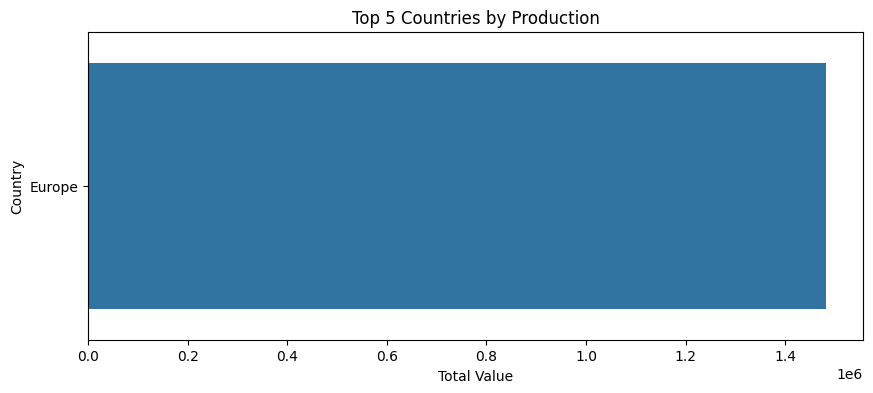

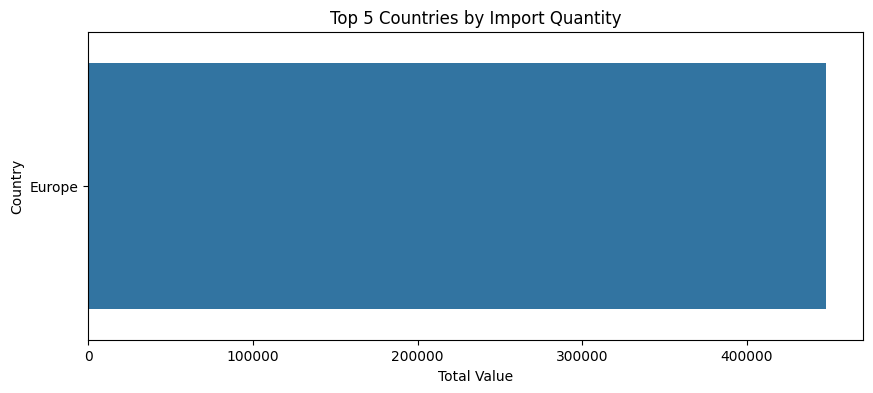

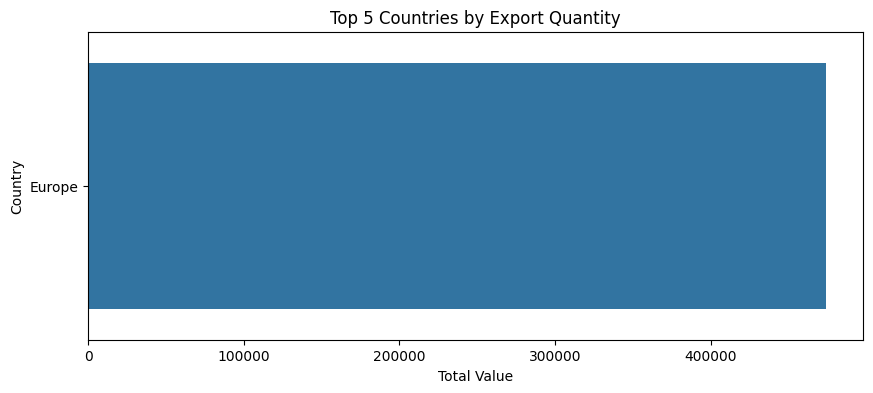

In [57]:
if 'Country' in filtered_df.columns:
    for element in key_elements:
        element_df = filtered_df[filtered_df['Element'] == element]
        if not element_df.empty:
            top_countries = element_df.groupby('Country')['Value'].sum().nlargest(5)
            plt.figure(figsize=(10, 4))
            sns.barplot(x=top_countries.values, y=top_countries.index)
            plt.title(f'Top 5 Countries by {element}')
            plt.xlabel('Total Value')
            plt.show()

### Item-Level Analysis

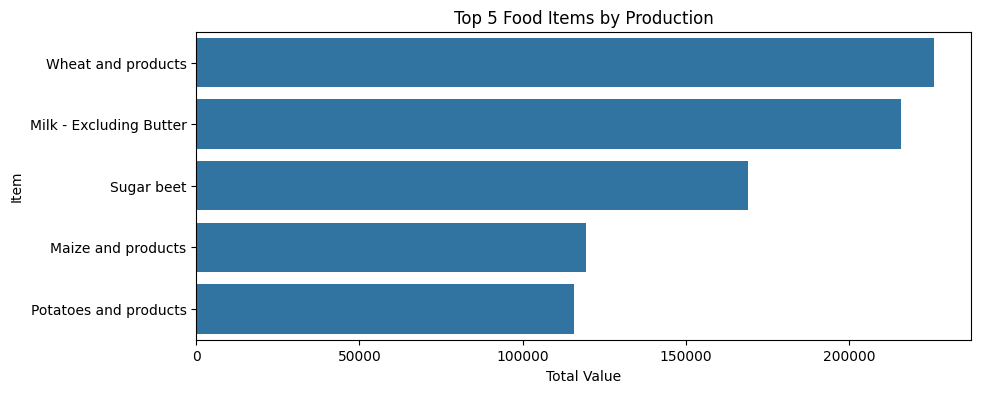

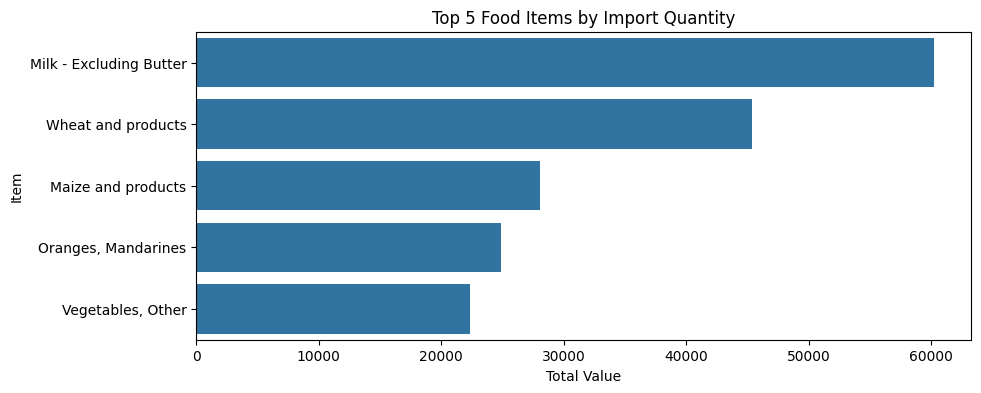

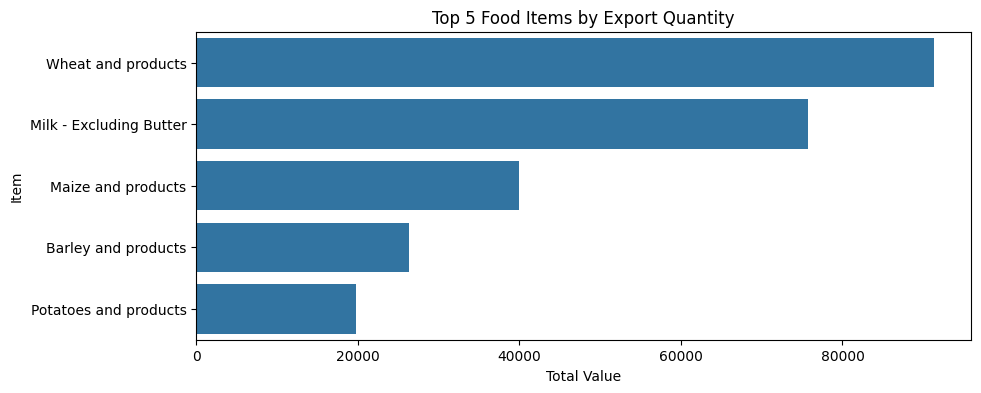

In [58]:
if 'Item' in filtered_df.columns:
    for element in key_elements:
        element_df = filtered_df[filtered_df['Element'] == element]
        if not element_df.empty:
            top_items = element_df.groupby('Item')['Value'].sum().nlargest(5)
            plt.figure(figsize=(10, 4))
            sns.barplot(x=top_items.values, y=top_items.index)
            plt.title(f'Top 5 Food Items by {element}')
            plt.xlabel('Total Value')
            plt.show()

### Comparative Analysis

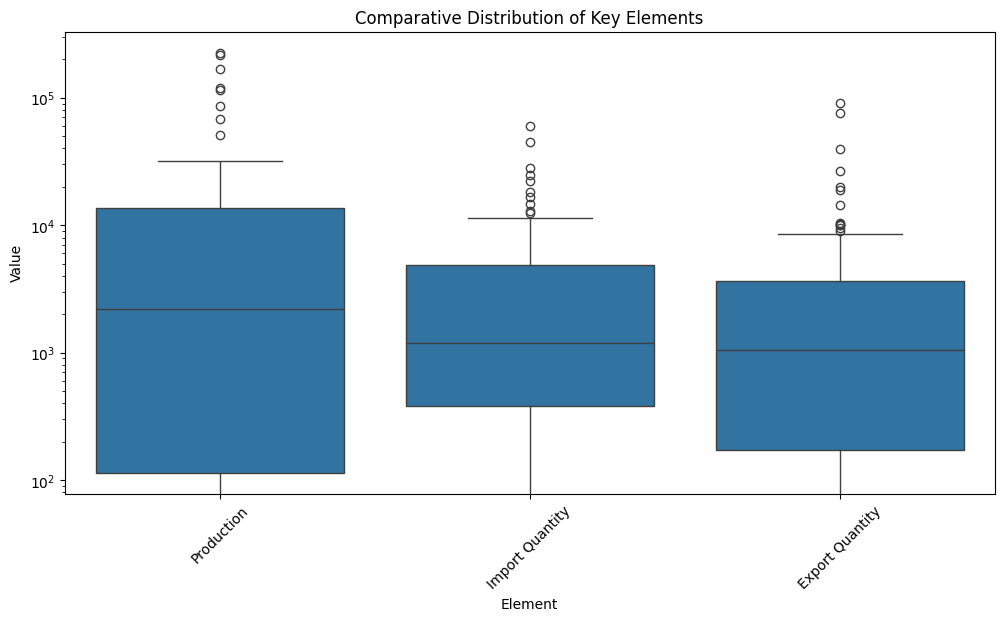

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Element', y='Value')
plt.yscale('log')  
plt.title('Comparative Distribution of Key Elements')
plt.xticks(rotation=45)
plt.show()

### Export Key Statistics

In [60]:
stats_df = filtered_df.groupby(['Element', 'Year'])['Value'].agg(['sum', 'mean', 'std'])
display(stats_df.head(10))


stats_df.to_csv('food_balance_stats.csv')

,,sum,mean,std
Element,Year,,,
Export Quantity,2013,474287.0,4992.494737,13077.258161
Import Quantity,2013,448139.0,4717.252632,9086.148561
Production,2013,1482415.0,17237.383721,42070.416449


### Overview Correlation Analysis

c:\Users\User\Documents\food sheet prediction\food-sheet-prediction\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\User\Documents\food sheet prediction\food-sheet-prediction\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


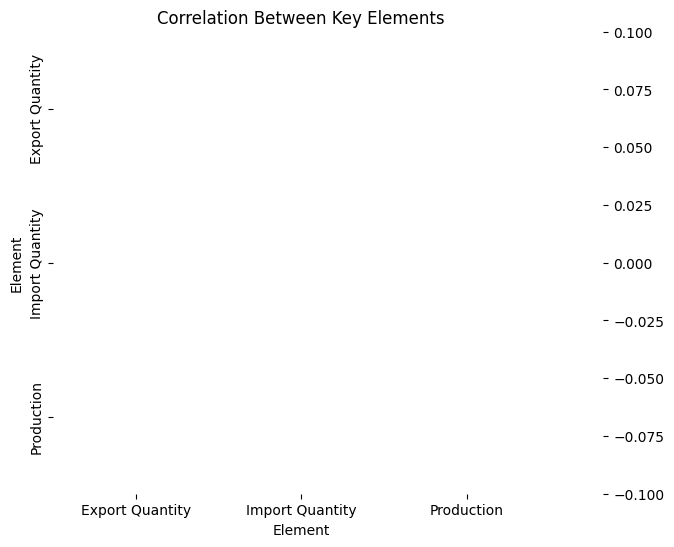

In [61]:
# Pivot to get element values by year and country
pivoted = filtered_df.pivot_table(index=['Year', 'Country'], 
                                columns='Element', 
                                values='Value')

# Calculate correlations
corr_matrix = pivoted.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Between Key Elements')
plt.show()

### Interactive Plot

C:\Users\User\AppData\Local\Temp\ipykernel_23012\2091098597.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


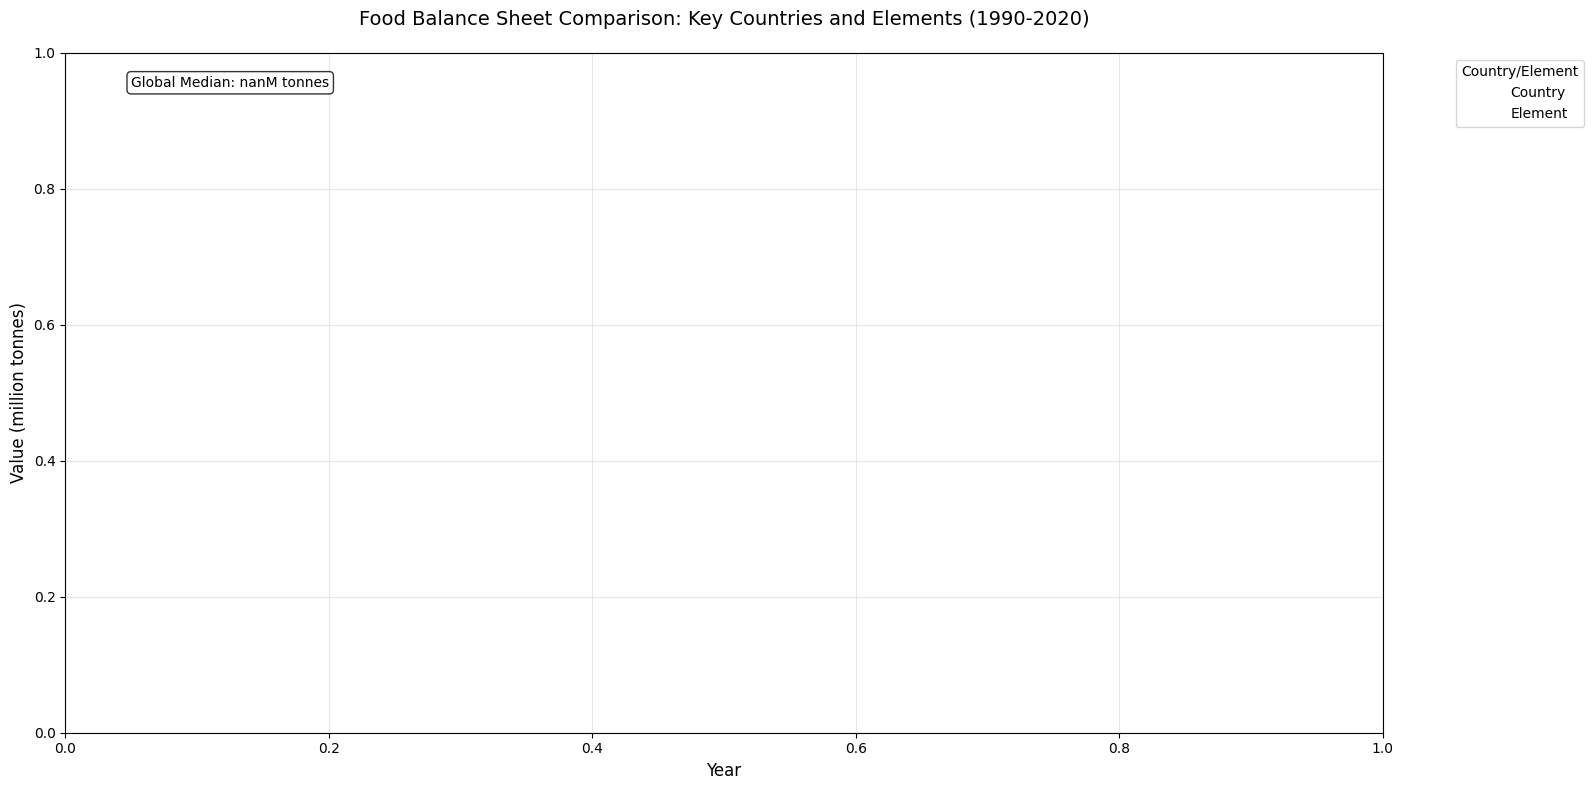

In [62]:
# Select specific countries of interest
focus_countries = ['China', 'United States', 'India', 'Brazil']
focus_df = filtered_df[filtered_df['Country'].isin(focus_countries)]

# Create the plot with enhanced markers
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=focus_df, 
    x='Year', 
    y='Value', 
    hue='Country', 
    style='Element',
    markers=True, 
    dashes=False,
    markersize=10,           # Increased marker size
    linewidth=2.9,           # Thicker lines
    palette='viridis',       # Colorblind-friendly palette
    style_order=['Production', 'Import Quantity', 'Export Quantity', 'Domestic supply']  
)

# Enhance marker visibility
marker_styles = ['o', 's', 'D', '^', 'v', 'p', '*']  
for i, line in enumerate(ax.lines):
    line.set_marker(marker_styles[i % len(marker_styles)])
    line.set_markersize(10)  

# Add direct value labels for key years
for country in focus_countries:
    for element in ['Production', 'Import Quantity', 'Export Quantity', 'Domestic supply']:
        subset = focus_df[(focus_df['Country'] == country) & (focus_df['Element'] == element)]
        if not subset.empty:
            # Label every 3rd year to avoid clutter
            for year in subset['Year'].unique()[::3]:
                row = subset[subset['Year'] == year].iloc[0]
                ax.text(year, row['Value'], 
                       f"{row['Value']/1e6:.1f}M", 
                       fontsize=9,
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                       va='center', ha='center')

# Add analytical elements
plt.axhline(y=focus_df['Value'].median(), color='gray', linestyle='--', alpha=0.5)
plt.annotate(f'Global Median: {focus_df["Value"].median()/1e6:.1f}M tonnes',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Formatting
plt.title('Food Balance Sheet Comparison: Key Countries and Elements (1990-2020)', pad=20, fontsize=14)
plt.ylabel('Value (million tonnes)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country/Element')


plt.tight_layout()

plt.show()

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

## Push generated/new files from this Session to your GitHub repo

* Git Add

In [ ]:
!git add .

* Git commit

In [ ]:
!git commit -am "Added data visualisation notebook"

Auto packing the repository in background for optimum performance.
See "git help gc" for manual housekeeping.
[main 71ed875] Added data visualisation notebook
 6 files changed, 8513 insertions(+), 8481 deletions(-)

* Git Push

In [ ]:
!git push origin main

Enumerating objects: 21, done.
Counting objects: 100% (21/21), done.
Delta compression using up to 32 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (11/11), 313.63 KiB | 3.27 MiB/s, done.
Total 11 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/Ebuka-martins/food-sheet-prediction.git
   fd59d36..71ed875  main -> main